In [57]:
import keras

# set random seed to ensure reproducibility
keras.utils.set_random_seed(42)

In [58]:
import pandas as pd
from train_val_test_split import train_val_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("datasets/processed_dataset.csv")
data = data.drop(columns=['MONTH', 'CITY'])

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(data)

# normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In [59]:
import tensorflow as tf
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

# use Early Stopping to combat potential overfitting.
earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
train_history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_data=(X_val, y_val),
    callbacks=earlystop,
)

Epoch 1/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.7549 - loss: 0.5137 - val_accuracy: 0.7814 - val_loss: 0.4575
Epoch 2/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.7971 - loss: 0.4447 - val_accuracy: 0.7929 - val_loss: 0.4400
Epoch 3/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.8026 - loss: 0.4316 - val_accuracy: 0.7997 - val_loss: 0.4306
Epoch 4/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.8051 - loss: 0.4248 - val_accuracy: 0.7981 - val_loss: 0.4258
Epoch 5/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.8073 - loss: 0.4210 - val_accuracy: 0.8008 - val_loss: 0.4229
Epoch 6/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8076 - loss: 0.4186 - val_accuracy: 0.8033 - val_loss: 0.4210
Epoch 7/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.8089 - loss: 0.4169 - val_accuracy: 0.8044 - val_loss: 0.4198
Epoch 8/200
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8086 - loss: 0

<Axes: >

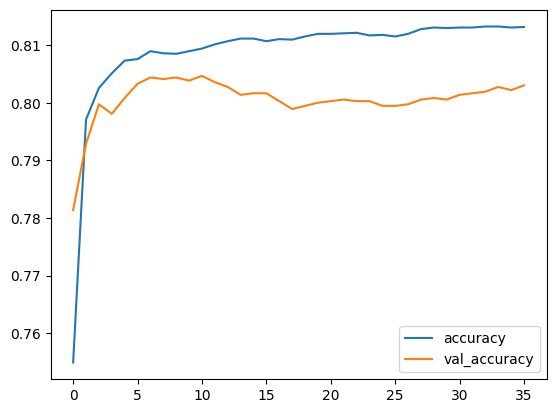

In [60]:
train_history_df = pd.DataFrame(train_history.history)

train_history_df[["accuracy", "val_accuracy"]].plot()

<Axes: >

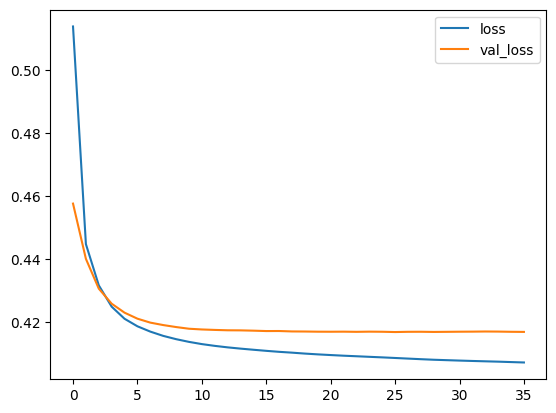

In [61]:
train_history_df[["loss", "val_loss"]].plot()

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


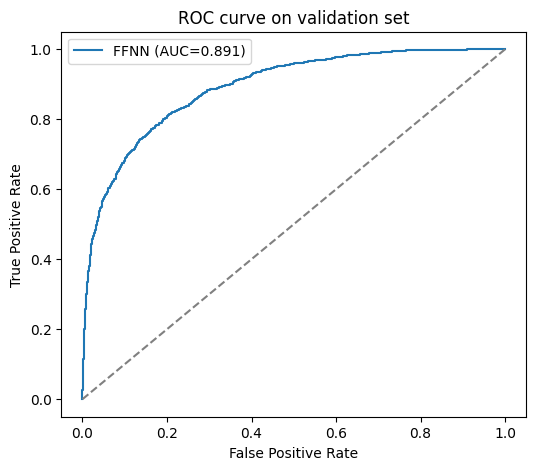

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_val_pred = model.predict(X_val)

fpr, tpr, _ = roc_curve(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"FFNN (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve on validation set")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import accuracy_score, fbeta_score

y_val_pred = y_val_pred > 0.5

print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"F2-score on validation set: {fbeta_score(y_val, y_val_pred, beta=2)}")

Accuracy on validation set: 0.8030136986301369
F2-score on validation set: 0.8144273127753304


Text(0.5, 1.0, 'Precipitation or not?')

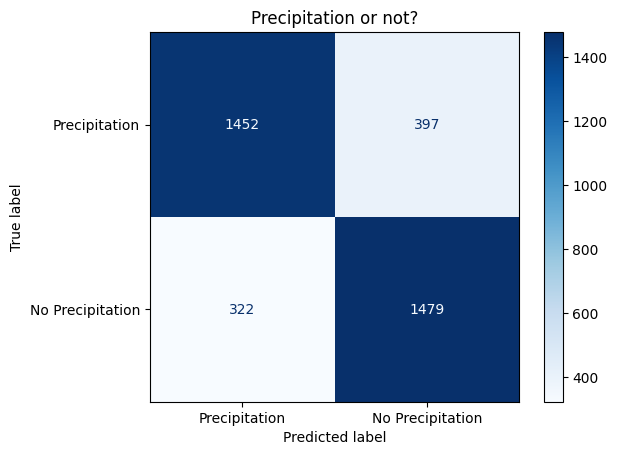

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_val_pred)
display = ConfusionMatrixDisplay(cm, display_labels=['Precipitation', 'No Precipitation'])
display.plot(cmap=plt.cm.Blues)
plt.title('Precipitation or not?')